# Assignment 2 Part B

## Importing neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('Hitters.csv')
raw_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Checking for null values

In [4]:
raw_data.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

## Dropping the null values

In [5]:
data = raw_data.dropna()

## Removing the categorical feature columns from the Dataset

In [6]:
data = data.drop(columns=data.select_dtypes('object').columns)

In [7]:
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


## Normalizing the the Dataset

In [8]:
for feature in data.columns[:-1]:
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,-0.601753,-0.594542,-0.527545,-1.203816,-0.521069,-0.097342,1.395233,0.346131,0.174042,-0.002914,-0.121439,0.258473,0.434506,1.219174,-0.522196,0.212946,475.0
2,0.511566,0.491323,0.728577,0.440675,0.792549,1.606310,-0.899485,-0.452004,-0.409112,-0.075909,-0.414315,-0.199211,0.010353,2.105095,-0.253380,0.818404,480.0
3,0.626971,0.735088,0.956963,0.401520,1.024364,-0.189431,0.769401,1.299081,1.315665,1.894952,1.409364,1.569674,0.354977,-0.324044,-0.742763,-0.846605,500.0
4,-0.561022,-0.461579,-0.184967,-0.616498,-0.366526,-0.511743,-1.108096,-0.989050,-0.958326,-0.696365,-0.945718,-0.879551,-0.860675,1.837176,-0.542874,-0.695240,91.5
5,1.292248,1.355583,-0.870124,0.753911,-0.018804,-0.281520,0.769401,0.765534,0.633776,-0.611205,0.422041,0.017261,-0.250955,-0.031118,2.083253,2.483412,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.633760,0.424841,-0.527545,0.401520,-0.134711,-0.189431,-0.482264,0.019880,0.129302,-0.453049,0.053682,-0.060050,-0.463031,0.122489,-0.756548,-0.846605,700.0
318,0.599817,0.624286,-0.755931,0.832220,-0.057440,2.435113,0.978012,1.247913,1.216930,-0.367888,1.617699,0.372894,2.328045,0.079622,1.807544,1.726590,875.0
319,0.484412,0.402681,-0.984317,0.244902,-0.327890,0.501239,-0.273653,-0.418766,-0.446138,-0.757194,-0.435450,-0.734205,-0.432735,-0.906323,-0.039705,-0.241147,385.0
320,1.149689,0.801570,-0.299159,1.184611,0.328919,1.698399,0.143569,0.236360,0.207982,0.337728,0.328442,0.277028,0.271662,3.655458,0.084364,0.515675,960.0


## Plotting Pearson Correlation Coefficients HeatMap

<Axes: >

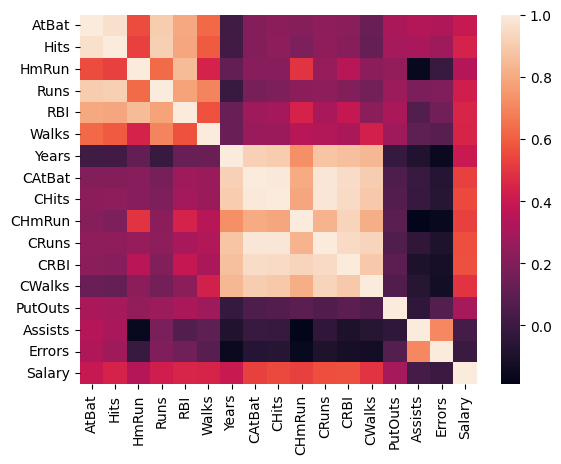

In [32]:
sns.heatmap(data.corr(method = 'pearson'))

## Making the PCA Dataset for Analysis

In [9]:
pca_data = data.drop('Salary', axis=1)
pca_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,-0.601753,-0.594542,-0.527545,-1.203816,-0.521069,-0.097342,1.395233,0.346131,0.174042,-0.002914,-0.121439,0.258473,0.434506,1.219174,-0.522196,0.212946
2,0.511566,0.491323,0.728577,0.440675,0.792549,1.606310,-0.899485,-0.452004,-0.409112,-0.075909,-0.414315,-0.199211,0.010353,2.105095,-0.253380,0.818404
3,0.626971,0.735088,0.956963,0.401520,1.024364,-0.189431,0.769401,1.299081,1.315665,1.894952,1.409364,1.569674,0.354977,-0.324044,-0.742763,-0.846605
4,-0.561022,-0.461579,-0.184967,-0.616498,-0.366526,-0.511743,-1.108096,-0.989050,-0.958326,-0.696365,-0.945718,-0.879551,-0.860675,1.837176,-0.542874,-0.695240
5,1.292248,1.355583,-0.870124,0.753911,-0.018804,-0.281520,0.769401,0.765534,0.633776,-0.611205,0.422041,0.017261,-0.250955,-0.031118,2.083253,2.483412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.633760,0.424841,-0.527545,0.401520,-0.134711,-0.189431,-0.482264,0.019880,0.129302,-0.453049,0.053682,-0.060050,-0.463031,0.122489,-0.756548,-0.846605
318,0.599817,0.624286,-0.755931,0.832220,-0.057440,2.435113,0.978012,1.247913,1.216930,-0.367888,1.617699,0.372894,2.328045,0.079622,1.807544,1.726590
319,0.484412,0.402681,-0.984317,0.244902,-0.327890,0.501239,-0.273653,-0.418766,-0.446138,-0.757194,-0.435450,-0.734205,-0.432735,-0.906323,-0.039705,-0.241147
320,1.149689,0.801570,-0.299159,1.184611,0.328919,1.698399,0.143569,0.236360,0.207982,0.337728,0.328442,0.277028,0.271662,3.655458,0.084364,0.515675


## Creating the Covariance Matrix

In [10]:
cov_mat = np.cov(pca_data, rowvar=False)
cov_mat.shape

(16, 16)

## Getting the Eigenvalues and Eigenvectors for the Covariance Matrix

In [11]:
eigvals, eigvecs = np.linalg.eig(cov_mat)
eigvecs = eigvecs.T
eigvals

array([7.24990606e+00, 4.10984817e+00, 1.72797668e+00, 8.70380332e-01,
       6.97370674e-01, 5.12373310e-01, 2.51685072e-01, 1.84941088e-01,
       1.32425387e-01, 9.79711095e-02, 6.13550622e-02, 5.50365752e-02,
       2.81843510e-02, 1.44496670e-02, 1.20214805e-03, 4.89431372e-03])

## Sorting the Eigenvectors according to descending values of the corresponding Eigenvalues

In [12]:
sorted_indices = np.flip(np.argsort(eigvals))
sorted_eigvals = eigvals[sorted_indices]
sorted_eigvecs = eigvecs[sorted_indices]
sorted_eigvecs *= -1

## Calculating the Explained Variance and Cummulative Variance

In [13]:
explained_variance = sorted_eigvals*100/sum(sorted_eigvals)
explained_variance.tolist()

[45.31191289374676,
 25.686551064655816,
 10.799854235754463,
 5.439877072015869,
 4.358566712205524,
 3.2023331868448057,
 1.5730316977331116,
 1.1558818011611414,
 0.8276586692793755,
 0.6123194341630334,
 0.3834691387304892,
 0.3439785950973098,
 0.17615219393437886,
 0.09031041865086982,
 0.030589460730084887,
 0.007513425296982493]

In [14]:
cummulative_variance = [sum(explained_variance[ : i + 1]) for i in range(len(explained_variance))]
cummulative_variance

[45.31191289374676,
 70.99846395840257,
 81.79831819415703,
 87.23819526617291,
 91.59676197837844,
 94.79909516522325,
 96.37212686295636,
 97.52800866411751,
 98.35566733339688,
 98.9679867675599,
 99.3514559062904,
 99.69543450138771,
 99.8715866953221,
 99.96189711397297,
 99.99248657470305,
 100.00000000000003]

## Plotting the Explained Variance and Cummulative Variance Values

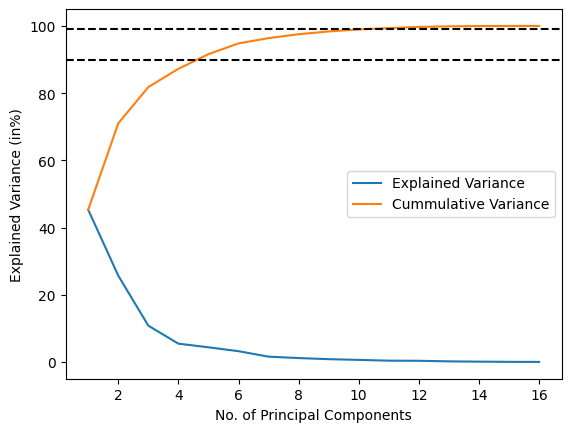

In [15]:
x = range(1, len(sorted_eigvecs)+1)
plt.plot(x, explained_variance, label='Explained Variance')
plt.plot(x, cummulative_variance, label='Cummulative Variance')
plt.axhline(y=90, color='black', linestyle='--')
plt.axhline(y=99, color='black', linestyle='--')
plt.xlabel('No. of Principal Components')
plt.ylabel('Explained Variance (in%)')
plt.legend()
plt.show()

## Defining the functions related to the Regression Model

In [16]:
def fit(X, y):
    XT_X = np.matmul(X.T, X)
    XT_Y = np.matmul(X.T, y)
    w = np.matmul(np.linalg.inv(XT_X), XT_Y)
    return w

In [17]:
def mse_error(X, y, w):
    h = w.dot(X.T)
    error = sum((y-h)**2)
    return error/(2*len(data))

## Building a regression model for each selected set of principal components

In [18]:
def pca_regression(train_data, test_data, eigvecs, min_comp, max_comp):
    train_data = train_data.to_numpy()
    test_data = test_data.to_numpy()
    X_train = train_data[:, :-1]
    y_train = train_data[:, -1]
    X_test = test_data[:, :-1]
    y_test = test_data[:, -1]

    comp_list = range(min_comp, max_comp+1)
    testing_mse_error= []
    testing_rmse_error = []
    for n in comp_list:
        transformed_X_train = np.matmul(X_train, sorted_eigvecs[:n].T)
        transformed_X_test = np.matmul(X_test, sorted_eigvecs[:n].T)
        w = fit(transformed_X_train, y_train)
        testing_mse_error.append(mse_error(transformed_X_test, y_test, w))
        testing_rmse_error.append((mse_error(transformed_X_test, y_test, w))**(1/2))
    
    return testing_mse_error, testing_rmse_error


## Splitting the data into Training and Testing Sets

In [19]:
train_data = data.sample(frac=0.8, random_state=200)
test_data = data.drop(train_data.index)

In [20]:
train_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
185,0.674491,0.624286,-0.755931,0.284057,-0.134711,1.928622,0.560790,0.334760,0.382311,-0.599039,0.141243,-0.084790,0.582202,-0.806299,0.959739,-0.089783,725.0
161,1.190420,1.466385,-0.527545,0.479829,1.024364,0.777507,-0.273653,0.172946,0.243465,-0.453049,0.014431,0.020354,-0.160065,-0.038263,2.483031,-0.543876,657.0
182,1.061438,1.178298,1.642121,1.341229,1.719808,1.145864,-0.690875,-0.379844,-0.389057,-0.051577,-0.387141,-0.217765,-0.398651,0.147495,-0.756548,-0.089783,625.0
274,0.803473,0.712928,0.500191,0.714757,0.985728,0.869596,-0.690875,-0.842980,-0.828736,-0.574707,-0.809848,-0.694003,-0.659959,3.676891,0.325609,1.272497,200.0
318,0.599817,0.624286,-0.755931,0.832220,-0.057440,2.435113,0.978012,1.247913,1.216930,-0.367888,1.617699,0.372894,2.328045,0.079622,1.807544,1.726590,875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-0.608542,-0.550221,0.157612,-0.616498,-0.211983,-1.156368,-0.482264,-0.525038,-0.489334,-0.501712,-0.619630,-0.530103,-0.697830,0.865520,-0.542874,-0.695240,431.5
233,0.925667,0.602125,2.098893,1.067148,1.410722,0.639373,-1.316707,-0.926073,-0.905873,-0.477381,-0.843061,-0.749668,-0.777359,-0.477651,-0.777226,0.818404,172.0
100,0.620183,0.956693,0.614384,0.244902,1.256178,1.698399,0.560790,1.297332,1.476110,2.503242,1.578447,2.117038,1.699390,2.694519,-0.212023,0.667039,2460.0
130,-0.662850,-0.084850,0.271805,-0.185798,0.251647,-0.741966,-0.065042,0.129650,0.153986,-0.173236,-0.145594,0.144052,-0.277465,-0.624114,0.711601,0.969768,750.0


In [33]:
test_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
2,0.511566,0.491323,0.728577,0.440675,0.792549,1.606310,-0.899485,-0.452004,-0.409112,-0.075909,-0.414315,-0.199211,0.010353,2.105095,-0.253380,0.818404,480.000
4,-0.561022,-0.461579,-0.184967,-0.616498,-0.366526,-0.511743,-1.108096,-0.989050,-0.958326,-0.696365,-0.945718,-0.879551,-0.860675,1.837176,-0.542874,-0.695240,91.500
8,-0.547445,-0.594542,-0.641738,-1.125507,-0.752884,-1.524725,-1.108096,-1.013103,-0.981467,-0.769360,-0.994028,-0.916660,-0.955351,-0.527663,1.180306,1.575225,75.000
16,1.115746,1.111817,0.956963,1.341229,0.908456,1.468176,1.603844,2.366175,2.392494,1.310993,2.064560,2.049004,1.786493,-0.663409,1.180306,0.212946,775.000
19,-1.877998,-1.680407,-0.413352,-1.517053,-1.139243,-1.248457,0.143569,-0.844292,-0.836450,-0.550376,-0.888351,-0.768222,-0.773572,-0.316899,-0.666943,-0.997969,135.000
24,1.529846,1.333422,0.728577,0.714757,1.951623,-0.051297,2.229677,2.521866,2.687156,1.152838,1.952845,2.293308,0.536757,2.773109,0.263575,0.818404,776.667
27,0.477624,0.469162,-0.184967,-0.185798,0.174375,-0.051297,0.560790,-0.142809,-0.182330,-0.100241,-0.347890,-0.010571,-0.356993,1.576400,-0.246487,0.667039,750.000
47,-1.348492,-1.126394,-0.413352,-0.812271,-0.752884,-1.478681,-0.482264,-0.831609,-0.817937,-0.453049,-0.737384,-0.690911,-0.792507,-0.831305,-0.791012,-0.695240,247.500
56,-1.083739,-1.104234,-0.299159,-1.047198,-1.023335,-0.281520,-0.690875,-0.578393,-0.600411,-0.246230,-0.595475,-0.468254,-0.250955,-0.531235,-0.722085,-0.997969,340.000
68,0.796685,0.757249,0.956963,0.479829,1.333450,0.178926,-0.690875,-0.805807,-0.797881,-0.574707,-0.791732,-0.703281,-0.690256,-0.656264,0.849456,2.180683,105.000


In [22]:
testing_mse_error, testing_rmse_error = pca_regression(train_data, test_data, sorted_eigvecs, 3, 11)

## Plotting the RMSE Error for each of the models

<function matplotlib.pyplot.show(close=None, block=None)>

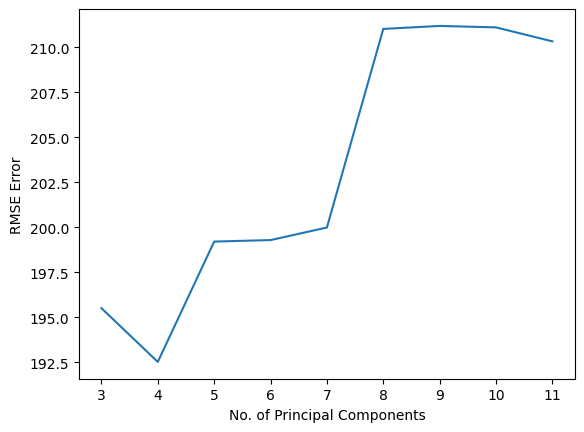

In [23]:
plt.plot(range(3, 12), testing_rmse_error)
#plt.axhline(y=200, color='black', linestyle='--')
plt.xlabel('No. of Principal Components')
plt.ylabel('RMSE Error')
plt.show

## Predicting testing dataset values using the the best model from the above graph

In [25]:
X_train = train_data.values[:, :-1]
y_train = train_data.values[:, -1]
X_test = test_data.values[:, :-1]
y_test = test_data.values[:, -1]

In [27]:
k=4
transformed_X_train = np.matmul(X_train, sorted_eigvecs[:k].T)
transformed_X_test = np.matmul(X_test, sorted_eigvecs[:k].T)

In [28]:
w = fit(transformed_X_train, y_train)
pred_vals = np.matmul(transformed_X_test, w)

In [29]:
pred_vals

array([ 147.26077917, -166.54388149, -371.41913591,  570.52072861,
       -340.33625215,  752.09226597,   88.82403632, -342.40292239,
       -245.18335536, -124.26406725,  920.16287966,  683.54320213,
        -42.13056285,  448.6236289 , -350.51866655,  131.1276779 ,
        153.57928846, -212.05593783,  477.24309291,  -54.24517692,
        241.02385556,   90.91163139,   41.89006505,   67.66279243,
       -194.41740113,   -7.28099557, -329.22892357, -128.78129304,
        753.41452909, -289.89646644, -164.08659063,  175.43956422,
        238.75741278, -353.58904535,   -6.36810942,   -3.33493978,
          4.41565247, -225.77923211,    4.0165695 ,  -11.67588546,
        173.1648604 ,   88.45202968, -281.75605898,  -39.81785977,
        915.27802419, -129.80556144,  -92.0017932 ,  225.28966373,
       -138.96653587,  163.08512783,   90.10023955, -252.41987704,
         23.77677532])

In [30]:
y_test

array([ 480.   ,   91.5  ,   75.   ,  775.   ,  135.   ,  776.667,
        750.   ,  247.5  ,  340.   ,  105.   ,  535.   ,  933.333,
        850.   , 1975.   ,   70.   , 1175.   ,  900.   ,  362.5  ,
        733.333,  500.   , 1237.5  ,  430.   ,  365.   ,  277.5  ,
        155.   ,  640.   ,  110.   ,  450.   , 1800.   ,  125.   ,
        202.5  ,  525.   ,  800.   ,   75.   ,  575.   ,  780.   ,
        875.   ,  175.   ,  700.   ,  750.   ,  450.   , 1260.   ,
        190.   ,  560.   ,  487.5  ,  425.   ,  450.   ,  100.   ,
        155.   ,  530.   ,  925.   ,  245.   ,  750.   ])